# Exportação de vinho
- Quais os 5 países que mais pagam (Montante do valor em US$)
- Quais os 5 que mais importam
- Possiveis mercados (países) futuros, potencial compradores 

# O Head de Dados pediu para que você construísse uma tabela contendo as seguintes informações:
- País de origem (Brasil).
- País de destino.
- Quantidade em litros de vinho exportado (utilize: 1KG =1L).
- Valor em US$

In [2]:
import warnings 
warnings.filterwarnings(action = 'ignore')



In [3]:
import pandas as pd
import numpy as np


In [4]:
data = pd.read_csv('/Users/lucas/pos-tech/challenge/wine_data/wine_info/ExpVinho.csv', sep='\t')
data.head()

,Id,País,1970,1970.1,1971,1971.1,1972,1972.1,1973,1973.1,...,2020,2020.1,2021,2021.1,2022,2022.1,2023,2023.1,2024,2024.1
0,1,Afeganistão,0,0,0,0,0,0,0,0,...,0,0,11,46,0,0,0,0,0,0
1,2,África do Sul,0,0,0,0,0,0,0,0,...,4,21,0,0,0,0,117,698,103,1783
2,3,"Alemanha, República Democrática",0,0,0,0,4168,2630,12000,8250,...,6261,32605,2698,6741,7630,45367,4806,31853,6666,48095
3,4,Angola,0,0,0,0,0,0,0,0,...,0,0,0,0,4068,4761,0,0,0,0
4,5,Anguilla,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# data cleaning

In [5]:
data = data.drop(columns=['Id'])

In [6]:
# null columns
data.isnull().sum().sum()

np.int64(0)

In [7]:
#Selecionando as colunas de 2009 ate 2024
selection = data.loc[:,'2009':'2024.1']
#Juntar a tabela selection com a coluna Pais da tabela data na opisição 0
dados_usaveis = pd.merge(data[['País']], selection, left_index=True, right_index=True)

In [8]:
dados_usaveis.head()

,País,2009,2009.1,2010,2010.1,2011,2011.1,2012,2012.1,2013,...,2020,2020.1,2021,2021.1,2022,2022.1,2023,2023.1,2024,2024.1
0,Afeganistão,0,0,0,0,0,0,0,0,0,...,0,0,11,46,0,0,0,0,0,0
1,África do Sul,0,0,0,0,0,0,0,0,0,...,4,21,0,0,0,0,117,698,103,1783
2,"Alemanha, República Democrática",225086,393482,27715,138666,36070,144150,8189,56342,61699,...,6261,32605,2698,6741,7630,45367,4806,31853,6666,48095
3,Angola,54786,84235,33557,189891,13889,69001,2833,8861,1573,...,0,0,0,0,4068,4761,0,0,0,0
4,Anguilla,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# import do re

In [9]:
import re
#salvar todas as colunas que possuem ano.1
coluna_valor = [i for i in dados_usaveis.columns if re.match(r'\d{4}\.1$', i)] 

coluna_valor

['2009.1',
 '2010.1',
 '2011.1',
 '2012.1',
 '2013.1',
 '2014.1',
 '2015.1',
 '2016.1',
 '2017.1',
 '2018.1',
 '2019.1',
 '2020.1',
 '2021.1',
 '2022.1',
 '2023.1',
 '2024.1']

In [10]:

tabelas_valor = dados_usaveis[coluna_valor]

In [11]:
tabelas_valor.head()

,2009.1,2010.1,2011.1,2012.1,2013.1,2014.1,2015.1,2016.1,2017.1,2018.1,2019.1,2020.1,2021.1,2022.1,2023.1,2024.1
0,0,0,0,0,0,0,0,0,0,0,0,0,46,0,0,0
1,0,0,0,0,0,0,0,0,0,0,95,21,0,0,698,1783
2,393482,138666,144150,56342,265978,761653,44780,68109,87702,45382,25467,32605,6741,45367,31853,48095
3,84235,189891,69001,8861,9300,23124,17089,35390,61680,709,1065,0,0,4761,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [12]:
#fazendo um merge com a tabela dados_usaveis['País'] e a tabela tabelas_valor   
tabelas_valor = pd.merge(dados_usaveis['País'], tabelas_valor, left_index=True, right_index=True)
tabelas_valor.head()


,País,2009.1,2010.1,2011.1,2012.1,2013.1,2014.1,2015.1,2016.1,2017.1,2018.1,2019.1,2020.1,2021.1,2022.1,2023.1,2024.1
0,Afeganistão,0,0,0,0,0,0,0,0,0,0,0,0,46,0,0,0
1,África do Sul,0,0,0,0,0,0,0,0,0,0,95,21,0,0,698,1783
2,"Alemanha, República Democrática",393482,138666,144150,56342,265978,761653,44780,68109,87702,45382,25467,32605,6741,45367,31853,48095
3,Angola,84235,189891,69001,8861,9300,23124,17089,35390,61680,709,1065,0,0,4761,0,0
4,Anguilla,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [13]:
#Criando a tabela de quantidade
tabelas_quantidade = dados_usaveis.drop(columns=coluna_valor)
tabelas_quantidade.head()

,País,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Afeganistão,0,0,0,0,0,0,0,0,0,0,0,0,11,0,0,0
1,África do Sul,0,0,0,0,0,0,0,0,0,0,26,4,0,0,117,103
2,"Alemanha, República Democrática",225086,27715,36070,8189,61699,213348,10680,14012,15467,10794,3660,6261,2698,7630,4806,6666
3,Angola,54786,33557,13889,2833,1573,12182,1908,7359,10170,477,345,0,0,4068,0,0
4,Anguilla,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [14]:

tabelas_valor.rename(columns= {'País': 'pais'}, inplace=True)
tabelas_quantidade.rename(columns= {'País': 'pais'}, inplace=True)
dados_usaveis.rename(columns= {'País': 'pais'}, inplace=True)

In [15]:
tabelas_quantidade.set_index('pais', inplace=True)
tabelas_valor.set_index('pais', inplace=True)

In [16]:
tabelas_quantidade['quantidade_total'] = tabelas_quantidade.sum(axis=1)
tabelas_valor['valor_total'] = tabelas_valor.sum(axis=1) 

In [17]:
# limpando os nomes dos paises. retirando os espaços em branco e caracteres especiais e acentuação
from unidecode import unidecode
dados_usaveis['pais'] = dados_usaveis['pais'].map(lambda x: unidecode(x))
tabelas_quantidade.index = tabelas_quantidade.index.map(lambda x: unidecode(x))
tabelas_valor.index = tabelas_valor.index.map(lambda x: unidecode(x))

nome_dos_paises = {
        'Alemanha, Republica Democratica': 'Alemanha',
        'Alemanha, Republica Democratica da': 'Alemanha',
        'Belice': 'Belize',
        'Belize': 'Belize',
        'Camaroes': 'Camaroes',
        'Camores': 'Camaroes',
        'Coreia do Sul, Republica da': 'Coreia do Sul',
        'Coreia do Sul, Republica': 'Coreia do Sul',
        'Coreia do Sul': 'Coreia do Sul',
        'Coreia, Republica Sul': 'Coreia do Sul',
        'Coreia, Republica Sul': 'Coreia do Sul',
        'Dominica': 'Dominica',
        'Dominica, Ilha de': 'Dominica',
        'Eslovaca, Republica': 'Eslovaquia',
        'Falkland (Ilhas Malvinas)': 'Ilhas Malvinas',
        'Falkland (Malvinas)': 'Ilhas Malvinas',
        'Filanldia': 'Finlandia',
        'Finlandia': 'Finlandia',
        'Guine Bissau': 'Guine-Bissau',
        'Guine Bissau': 'Guine-Bissau',
        'Cayman, Ilhas': 'Ilhas Cayman',
        'Marshall, Ilhas': 'Ilhas Marshall',
        'Paises Baixos': 'Holanda',
        'Paises Baixos (Holanda)': 'Holanda',
        'Russia': 'Russia',
        'Russia, Federacao da': 'Russia',
        'Republica Federativa da Russia': 'Russia',
        'Taiwan (FORMOSA)': 'Taiwan',
        'Taiwan (Formosa)': 'Taiwan',
        'Trindade e Tobago': 'Trindade e Tobago',
        'Trinidade Tobago': 'Trindade e Tobago',
        'Trinidade e Tobago': 'Trindade e Tobago',
        'Tcheca, Republica': 'Republica Tcheca',
        'Georgia do Sul e Sandwich do Sul, Ilhas': 'Ilhas Georgia do Sul e Sandwich do Sul'
}

# Substituindo os nomes dos paises
dados_usaveis['pais'] = dados_usaveis['pais'].map(lambda x: nome_dos_paises[x] if x in nome_dos_paises else x)
tabelas_quantidade.index = tabelas_quantidade.index.map(lambda x: nome_dos_paises[x] if x in nome_dos_paises else x)
tabelas_valor.index = tabelas_valor.index.map(lambda x: nome_dos_paises[x] if x in nome_dos_paises else x)




In [18]:
#dados_usaveis['valor_por_quantidade'] = (tabelas_valor['valor_total'] / tabelas_quantidade['quantidade_total']).round(2)
#list((tabelas_valor['valor_total'] / tabelas_quantidade['quantidade_total']).round(2))
dados_usaveis['valor_por_quantidade'] = list((tabelas_valor['valor_total'] / tabelas_quantidade['quantidade_total']).round(2))
dados_usaveis['valor_por_quantidade'] = dados_usaveis['valor_por_quantidade'].astype(float)

In [19]:
#dados_usaveis[dados_usaveis['valor_por_quantidade'] > 0]
tabelas_valor_columns = (tabelas_valor.columns.tolist())
tabelas_valor_columns.pop()
dados_usaveis.drop(columns=tabelas_valor_columns, inplace=True)

In [20]:
dados_usaveis.head()

,pais,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,valor_por_quantidade
0,Afeganistao,0,0,0,0,0,0,0,0,0,0,0,0,11,0,0,0,4.18
1,Africa do Sul,0,0,0,0,0,0,0,0,0,0,26,4,0,0,117,103,10.39
2,Alemanha,225086,27715,36070,8189,61699,213348,10680,14012,15467,10794,3660,6261,2698,7630,4806,6666,3.35
3,Angola,54786,33557,13889,2833,1573,12182,1908,7359,10170,477,345,0,0,4068,0,0,3.53
4,Anguilla,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN


In [21]:
dados_usaveis.set_index('pais', inplace=True)
dados_usaveis.head()

,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,valor_por_quantidade
pais,,,,,,,,,,,,,,,,,
Afeganistao,0,0,0,0,0,0,0,0,0,0,0,0,11,0,0,0,4.18
Africa do Sul,0,0,0,0,0,0,0,0,0,0,26,4,0,0,117,103,10.39
Alemanha,225086,27715,36070,8189,61699,213348,10680,14012,15467,10794,3660,6261,2698,7630,4806,6666,3.35
Angola,54786,33557,13889,2833,1573,12182,1908,7359,10170,477,345,0,0,4068,0,0,3.53
Anguilla,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN


In [22]:
#fazer o melt na tabela dados_usaveis
dados_usaveis_aberto = dados_usaveis.drop(columns=['valor_por_quantidade'])
dados_usaveis_aberto = dados_usaveis_aberto.T
dados_usaveis_aberto = dados_usaveis_aberto.reset_index()
dados_usaveis_aberto.head()


pais,index,Afeganistao,Africa do Sul,Alemanha,Angola,Anguilla,Antigua e Barbuda,Antilhas Holandesas,Arabia Saudita,Argelia,...,Togo,Toquelau,Trindade e Tobago,Tunisia,Turquia,Tuvalu,Uruguai,Vanuatu,Venezuela,Vietna
0,2009,0,0,225086,54786,0,0,8235,0,0,...,0,0,0,0,0,0,0,0,0,743
1,2010,0,0,27715,33557,0,0,9810,0,0,...,0,0,0,0,0,0,914,0,0,8820
2,2011,0,0,36070,13889,0,0,7335,0,0,...,0,0,0,0,0,0,1238,0,0,0
3,2012,0,0,8189,2833,0,0,9247,0,0,...,0,0,531,0,0,0,1135,0,1029,0
4,2013,0,0,61699,1573,0,0,11281,0,0,...,0,0,0,0,0,0,1526,0,0,0


In [23]:
dados_usaveis_aberto['index']

0     2009
1     2010
2     2011
3     2012
4     2013
5     2014
6     2015
7     2016
8     2017
9     2018
10    2019
11    2020
12    2021
13    2022
14    2023
15    2024
Name: index, dtype: object

In [24]:
dados_usaveis_aberto = dados_usaveis_aberto.melt(id_vars=['index'], value_vars=dados_usaveis_aberto.columns)

In [25]:
dados_usaveis_aberto.columns = ['ano', 'pais', 'quantidade_exportacao']
dados_usaveis_aberto.head()

,ano,pais,quantidade_exportacao
0,2009,Afeganistao,0
1,2010,Afeganistao,0
2,2011,Afeganistao,0
3,2012,Afeganistao,0
4,2013,Afeganistao,0


In [26]:
# melt tabela valor
tabela_valor_aberta = tabelas_valor.drop(columns=['valor_total'])
tabela_valor_aberta = tabela_valor_aberta.T
tabela_valor_aberta
#.reset_index().melt(id_vars=['index'], value_vars=tabelas_valor.drop(columns=['valor_total']).T.reset_index().columns, value_name='valor_exportacao')


pais,Afeganistao,Africa do Sul,Alemanha,Angola,Anguilla,Antigua e Barbuda,Antilhas Holandesas,Arabia Saudita,Argelia,Argentina,...,Togo,Toquelau,Trindade e Tobago,Tunisia,Turquia,Tuvalu,Uruguai,Vanuatu,Venezuela,Vietna
2009.1,0,0,393482,84235,0,0,10651,0,0,4523,...,0,0,0,0,0,0,0,0,0,2143
2010.1,0,0,138666,189891,0,0,12808,0,0,0,...,0,0,0,0,0,0,2929,0,0,9977
2011.1,0,0,144150,69001,0,0,10188,0,0,55460,...,0,0,0,0,0,0,4404,0,0,0
2012.1,0,0,56342,8861,0,0,14081,0,0,0,...,0,0,2720,0,0,0,3879,0,7492,0
2013.1,0,0,265978,9300,0,0,19565,0,0,0,...,0,0,0,0,0,0,13343,0,0,0
2014.1,0,0,761653,23124,0,0,7169,0,0,95130,...,0,0,1600,0,0,0,0,0,232,0
2015.1,0,0,44780,17089,0,0,10545,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2016.1,0,0,68109,35390,0,0,26450,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2017.1,0,0,87702,61680,0,0,8550,0,0,0,...,0,0,0,0,0,0,0,0,2646,0
2018.1,0,0,45382,709,0,191,0,0,0,59150,...,0,0,0,0,150,0,29617,0,355,0


In [27]:
tabela_valor_aberta = tabela_valor_aberta.reset_index().melt(id_vars=['index'], value_vars=tabelas_valor.drop(columns=['valor_total']).T.reset_index().columns, value_name='valor_exportacao')
tabela_valor_aberta.head()

,index,pais,valor_exportacao
0,2009.1,Afeganistao,0
1,2010.1,Afeganistao,0
2,2011.1,Afeganistao,0
3,2012.1,Afeganistao,0
4,2013.1,Afeganistao,0


In [28]:
tabela_valor_aberta.describe()

,valor_exportacao
count,2.256000e+03
mean,5.461018e+04
std,4.836567e+05
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,3.035500e+03
max,1.479569e+07


In [29]:
tabela_valor_aberta.columns = ['ano', 'pais', 'valor_exportacao']
display(tabela_valor_aberta)
display(dados_usaveis_aberto)

,ano,pais,valor_exportacao
0,2009.1,Afeganistao,0
1,2010.1,Afeganistao,0
2,2011.1,Afeganistao,0
3,2012.1,Afeganistao,0
4,2013.1,Afeganistao,0
...,...,...,...
2251,2020.1,Vietna,584
2252,2021.1,Vietna,0
2253,2022.1,Vietna,277
2254,2023.1,Vietna,128


,ano,pais,quantidade_exportacao
0,2009,Afeganistao,0
1,2010,Afeganistao,0
2,2011,Afeganistao,0
3,2012,Afeganistao,0
4,2013,Afeganistao,0
...,...,...,...
2251,2020,Vietna,86
2252,2021,Vietna,0
2253,2022,Vietna,130
2254,2023,Vietna,72


In [30]:
#Inserindo a coluna valor_exportacao na tabela dados_usaveis_aberto
dados_usaveis_aberto = pd.merge(dados_usaveis_aberto, tabela_valor_aberta['valor_exportacao'], left_index=True, right_index=True)

In [31]:
import matplotlib.pyplot as plt


In [32]:
dados_usaveis_aberto['ano'] = dados_usaveis_aberto['ano'].astype('int')
dados_usaveis_aberto

,ano,pais,quantidade_exportacao,valor_exportacao
0,2009,Afeganistao,0,0
1,2010,Afeganistao,0,0
2,2011,Afeganistao,0,0
3,2012,Afeganistao,0,0
4,2013,Afeganistao,0,0
...,...,...,...,...
2251,2020,Vietna,86,584
2252,2021,Vietna,0,0
2253,2022,Vietna,130,277
2254,2023,Vietna,72,128


In [33]:
dados_usaveis_aberto.describe()

,ano,quantidade_exportacao,valor_exportacao
count,2256.000000,2.256000e+03,2.256000e+03
mean,2016.500000,3.922848e+04,5.461018e+04
std,4.610794,5.465939e+05,4.836567e+05
min,2009.000000,0.000000e+00,0.000000e+00
25%,2012.750000,0.000000e+00,0.000000e+00
50%,2016.500000,0.000000e+00,0.000000e+00
75%,2020.250000,7.485000e+02,3.035500e+03
max,2024.000000,2.191291e+07,1.479569e+07


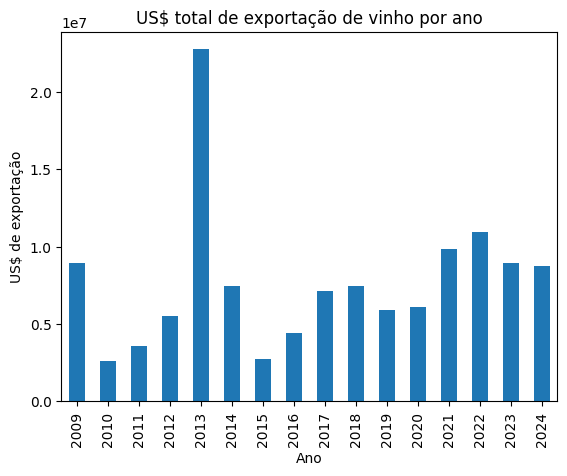

In [34]:
#quantidade total de exportação por ano
dados_usaveis_aberto.groupby('ano')['valor_exportacao'].sum().plot(kind='bar', title='US$ total de exportação de vinho por ano')
#plotando os valores no topo da barra do gráfico
plt.xlabel('Ano')
plt.ylabel('US$ de exportação')
plt.show()

# Analisando por pais

In [35]:
import seaborn as sns

## Separando por continentes


In [36]:

africa = [
        'Africa do Sul', 'Angola', 'Argelia', 'Benin', 'Cabo Verde',
        'Camaroes', 'Comores', 'Congo', 'Costa do Marfim', 'Gabao', 'Gana',
        'Guine-Bissau', 'Guine Equatorial', 'Liberia', 'Malavi', 'Mauritania',
        'Mocambique', 'Namibia', 'Nigeria', 'Quenia', 'Senegal', 'Serra Leoa',
        'Suazilandia', 'Tanzania', 'Togo', 'Tunisia'
    ]
asia = [
        'Afeganistao', 'Arabia Saudita', 'Bangladesh', 'Barein', 'Catar',
        'China', 'Cingapura', 'Coreia do Sul', 'Coveite (Kuweit)',
        'Emirados Arabes Unidos', 'Filipinas', 'Hong Kong', 'India',
        'Indonesia', 'Ira', 'Iraque', 'Japao', 'Jordania', 'Libano',
        'Malasia', 'Macau', 'Oma', 'Singapura', 'Taiwan', 'Tailandia',
        'Turquia', 'Vietna'
    ]
europa = [
        'Alemanha', 'Austria', 'Belgica', 'Bosnia-Herzegovina', 'Bulgaria',
        'Chipre', 'Croacia', 'Dinamarca', 'Eslovaquia', 'Espanha', 'Estonia',
        'Finlandia', 'Franca', 'Gibraltar', 'Grecia', 'Holanda', 'Hungria',
        'Ilha de Man', 'Irlanda', 'Italia', 'Letonia', 'Luxemburgo', 'Malta',
        'Montenegro', 'Noruega', 'Polonia', 'Portugal', 'Reino Unido',
        'Republica Tcheca', 'Russia', 'Servia', 'Suecia', 'Suica'
    ]
america_do_norte = [
        'Anguilla', 'Antigua e Barbuda', 'Antilhas Holandesas', 'Bahamas',
        'Barbados', 'Belize', 'Bermudas', 'Canada', 'Costa Rica', 'Cuba',
        'Curacao', 'Dominica', 'El Salvador', 'Estados Unidos', 'Granada',
        'Guatemala', 'Haiti', 'Honduras', 'Ilhas Cayman', 'Ilhas Virgens',
        'Jamaica', 'Mexico', 'Nicaragua', 'Panama', 'Porto Rico',
        'Republica Dominicana', 'Sao Cristovao e Nevis',
        'Sao Vicente e Granadinas', 'Trindade e Tobago'
    ]
america_do_sul = [
        'Argentina', 'Bolivia', 'Brasil', 'Chile', 'Colombia', 'Equador',
        'Guiana', 'Guiana Francesa', 'Paraguai', 'Peru', 'Suriname',
        'Uruguai', 'Venezuela'
    ]
oceania = [
        'Australia', 'Cocos (Keeling), Ilhas', 'Ilhas Marshall',
        'Nova Caledonia', 'Nova Zelandia', 'Palau', 'Pitcairn', 'Toquelau',
        'Tuvalu', 'Vanuatu'
    ]



In [38]:
dados_usaveis_aberto.describe().round(2)

,ano,quantidade_exportacao,valor_exportacao
count,2256.00,2256.00,2256.00
mean,2016.50,39228.48,54610.18
std,4.61,546593.93,483656.73
min,2009.00,0.00,0.00
25%,2012.75,0.00,0.00
50%,2016.50,0.00,0.00
75%,2020.25,748.50,3035.50
max,2024.00,21912914.00,14795694.00


In [39]:
#excluir valores zeros
dados_usaveis_aberto.query('valor_exportacao > 0').describe().round(2)

,ano,quantidade_exportacao,valor_exportacao
count,818.00,818.00,818.00
mean,2017.88,108190.05,150611.94
std,4.63,903963.70,794465.84
min,2009.00,0.00,2.00
25%,2014.00,450.00,1767.25
50%,2019.00,2753.50,11629.00
75%,2022.00,14488.50,48927.50
max,2024.00,21912914.00,14795694.00


In [40]:
teste = dados_usaveis_aberto.query('ano >2009')
teste['us$/l'] = teste.apply(lambda row: 0 if row['quantidade_exportacao'] == 0 else row['valor_exportacao']/row['quantidade_exportacao'], axis=1)
teste['us$/l'].describe()


count    2115.000000
mean        1.670536
std         3.314005
min         0.000000
25%         0.000000
50%         0.000000
75%         2.554883
max        58.000000
Name: us$/l, dtype: float64

In [41]:
#teste.to_csv('/Users/lucas/pos-tech/challenge/wine_data/dados_tratados/dados_expVinho.csv')

#

função que retorna o grafico por continente

In [42]:
import matplotlib.ticker as mticker # Para formatar o eixo Y


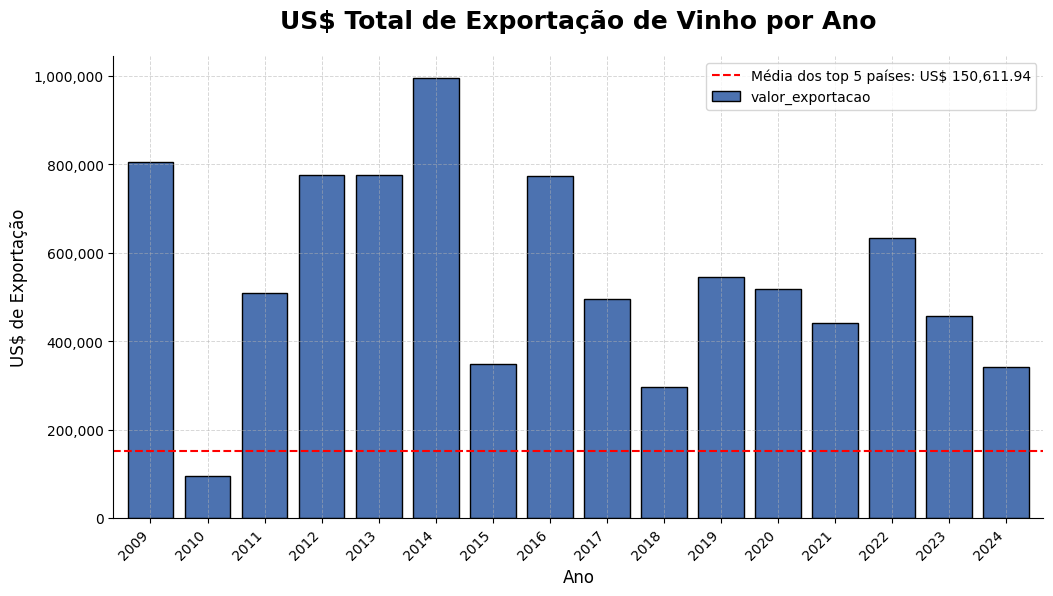

In [63]:
def grafico_continente(continente:list):
    plt.figure(figsize=(12, 6))
    dados_usaveis_continente = dados_usaveis_aberto.query('pais in @continente')
    # criando o grafico do valor
    dados_usaveis_continente.groupby('ano')['valor_exportacao'].sum().plot(kind='bar', 
                                                                           color='#4C72B0',
                                                                           edgecolor='black',
                                                                            width=0.8,)
    # criando linha horizontal com a media dos top 5 paises de 150611.94
    media_valor_exportacao = 150611.94
    plt.axhline(y=media_valor_exportacao,
                color='r', 
                linestyle='--', 
                linewidth=1.5,
                label=f'Média dos top 5 países: US$ {media_valor_exportacao:,.2f}' # Adiciona legenda e formata o número
                )
    # Formatação do eixo Y para melhor legibilidade dos números
    ax = plt.gca() # Get current axes
    ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: format(int(x), ',')))

    # Rotação dos ticks do eixo X se necessário (para anos)
    plt.xticks(rotation=45, ha='right')

    # Remover spines desnecessários (bordas do gráfico)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Título e Rótulos
    plt.title('US$ Total de Exportação de Vinho por Ano', fontsize=18, fontweight='bold', pad=20)
    plt.xlabel('Ano', fontsize=12)
    plt.ylabel('US$ de Exportação', fontsize=12)
    plt.legend()
    plt.grid(alpha=0.5, linestyle='--', linewidth=0.7)
    plt.show()

grafico_continente(asia)

# Analisando os países top 5

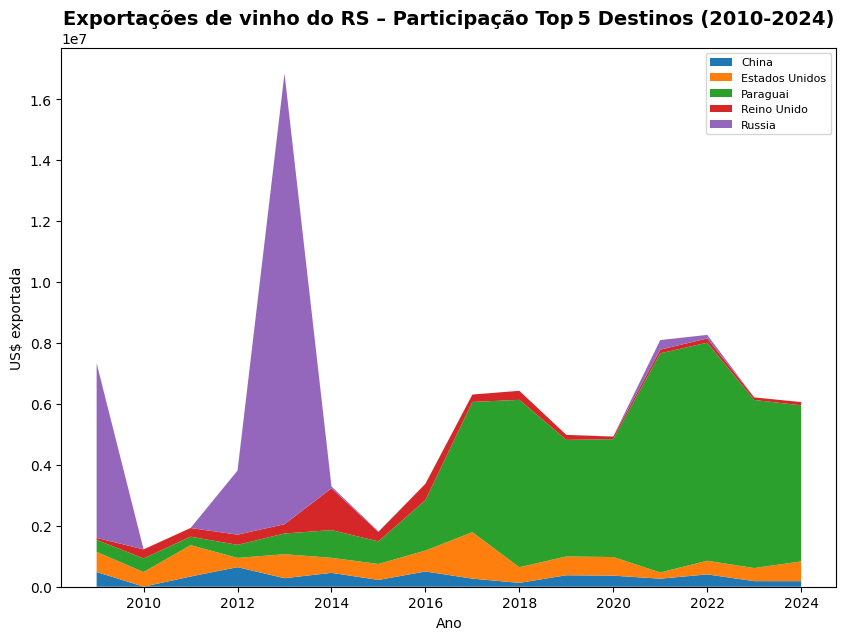

In [44]:
top_5 = dados_usaveis_aberto.groupby('pais')['valor_exportacao'].sum().sort_values(ascending=False).head(5).index

df_top_5 = dados_usaveis_aberto.query('pais in @top_5')

# Pivotando a tabela e deixando as colunas como pais e os indices como ano
pivot = (
    df_top_5.pivot_table(index='ano',
                       columns='pais',
                       values='valor_exportacao',
                       aggfunc='sum')
    .fillna(0)
    .sort_index()
)
# 5) Gráfico de área empilhada
plt.figure(figsize=(10, 7))
plt.stackplot(pivot.index, pivot.T, labels=pivot.columns)  
plt.title('Exportações de vinho do RS – Participação Top 5 Destinos (2010‑2024)', fontsize=14, fontweight='bold')
plt.xlabel('Ano')
plt.ylabel('US$ exportada')
plt.legend(loc='upper right', fontsize=8)
plt.show()



 # observe a espessura de cada camada — picos ou desaparecimentos indicam deslocamentos de mercado (ex.: entrada da Rússia em 2013, queda do Paraguai em 2016).

In [45]:
df_top_5.query('pais == "Russia"')

,ano,pais,quantidade_exportacao,valor_exportacao
1840,2009,Russia,21912914,5732280
1841,2010,Russia,0,0
1842,2011,Russia,0,0
1843,2012,Russia,4528176,2103968
1844,2013,Russia,5893291,14795694
1845,2014,Russia,190656,61440
1846,2015,Russia,47664,18240
1847,2016,Russia,0,0
1848,2017,Russia,0,0
1849,2018,Russia,0,0


In [46]:
df_top_5.groupby('pais')['quantidade_exportacao'].sum().sort_values(ascending=False)

pais
Paraguai          34508515
Russia            32822197
Estados Unidos     3659709
China              2608917
Reino Unido        1165560
Name: quantidade_exportacao, dtype: int64

# Primeiro agrego e depois eu faço a coluna

In [47]:
#	Volume vs. preço médio por país
#preço medio por pais
df_top_5_pais = df_top_5.groupby('pais').sum().drop(columns=['ano'])

df_top_5_pais['preco_por_litro'] = (df_top_5_pais['valor_exportacao'] / df_top_5_pais['quantidade_exportacao']).round(2)

df_top_5_pais.round(2)

,quantidade_exportacao,valor_exportacao,preco_por_litro
pais,,,
China,2608917,5086290,1.95
Estados Unidos,3659709,9957775,2.72
Paraguai,34508515,47984063,1.39
Reino Unido,1165560,4747648,4.07
Russia,32822197,23152054,0.71


In [48]:
df_top_5.head()

,ano,pais,quantidade_exportacao,valor_exportacao
496,2009,China,1553416,482400
497,2010,China,795,2358
498,2011,China,54156,334867
499,2012,China,87905,642177
500,2013,China,40929,279956


# Analisando por país

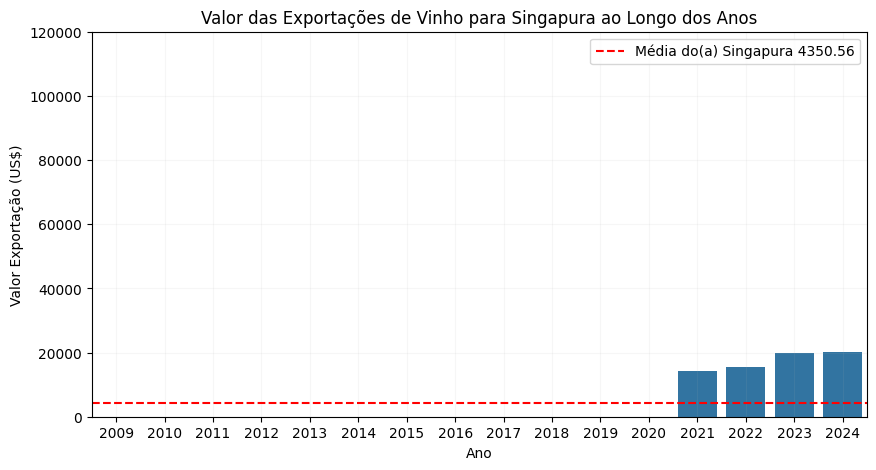

In [65]:

def grafico_valor_exp_pais(pais: str):
    

    dados_pais = dados_usaveis_aberto.query(f'pais == "{pais}"').groupby('ano')[['quantidade_exportacao','valor_exportacao']].sum().sort_values('ano',ascending=True)

    plt.figure(figsize=(10,5))
    
    sns.barplot(data=dados_pais, x='ano', y='valor_exportacao')
    media = dados_pais.valor_exportacao.mean()
    plt.axhline(y=media, color='red',linestyle='--', label=f'Média do(a) {pais} {media:.2f}')
    
    #plt.text(x=len(dados_pais)-1, y=media, s=f'Média: {media:.2f}', color='red', va='bottom',ha='right', fontsize=10, backgroundcolor='white')

    plt.title(f'Valor das Exportações de Vinho para {pais} ao Longo dos Anos')
    plt.ylim(0,dados_pais['valor_exportacao'].max()+100000)
    plt.xlabel('Ano')
    plt.ylabel('Valor Exportação (US$)')
    plt.legend()
    plt.grid(alpha=0.1)
    plt.show()
    

grafico_valor_exp_pais('Singapura')

#  Volume e preço entre os paises do 2 Quartil - 3Quartil

- Paises que melhor pagam US$/L

,ano,pais,quantidade_exportacao,valor_exportacao,us$/l
1,2010,Afeganistao,0,0,0.000000
2,2011,Afeganistao,0,0,0.000000
3,2012,Afeganistao,0,0,0.000000
4,2013,Afeganistao,0,0,0.000000
5,2014,Afeganistao,0,0,0.000000
...,...,...,...,...,...
2251,2020,Vietna,86,584,6.790698
2252,2021,Vietna,0,0,0.000000
2253,2022,Vietna,130,277,2.130769
2254,2023,Vietna,72,128,1.777778


In [77]:
df = teste.query('ano >= 2010 and `us$/l` > 0')

In [78]:
df.groupby('pais').sum().sort_values('us$/l', ascending=False)

,ano,quantidade_exportacao,valor_exportacao,us$/l
pais,,,,
Suica,26226,75707,661182,134.088170
Luxemburgo,28234,45743,293349,117.156789
Republica Tcheca,30255,42803,272105,110.489177
Nova Zelandia,26221,14368,82386,100.204673
Australia,30255,59469,393490,98.977163
...,...,...,...,...
Granada,2022,5610,7914,1.410695
Guiana Francesa,4043,112,50,1.173737
Bosnia-Herzegovina,2020,45,52,1.155556


In [79]:
valor_3Q = df['quantidade_exportacao'].quantile(0.75)
valor_2Q =df['quantidade_exportacao'].quantile(0.5)
print(valor_3Q, valor_2Q)

13524.0 2715.5


In [80]:
df_3Q_quantidade = df.query(f"quantidade_exportacao >= {valor_3Q} ").sort_values('quantidade_exportacao',ascending=False)
df_3Q_quantidade.reset_index(drop=True, inplace=True)

In [81]:
df_3Q_quantidade.sort_values('quantidade_exportacao',ascending=False)

,ano,pais,quantidade_exportacao,valor_exportacao,us$/l
0,2021,Paraguai,6522527,7192362,1.102696
1,2013,Russia,5893291,14795694,2.510600
2,2022,Paraguai,5076670,7156293,1.409643
3,2012,Russia,4528176,2103968,0.464639
4,2023,Paraguai,3780378,5517263,1.459447
...,...,...,...,...,...
190,2016,Alemanha,14012,68109,4.860762
191,2011,Angola,13889,69001,4.968032
192,2023,Portugal,13742,46311,3.370033
193,2016,Canada,13711,71096,5.185326


In [82]:
df_3Q_quantidade.groupby('pais').sum().sort_values('quantidade_exportacao',ascending=False)

,ano,quantidade_exportacao,valor_exportacao,us$/l
pais,,,,
Paraguai,30255,34021588,47591976,21.159350
Russia,12097,10907764,17410886,7.196190
Estados Unidos,30255,3287390,9297709,45.598980
Haiti,14147,2794718,3902394,10.301072
Espanha,2013,1972980,3748940,1.900141
Uruguai,8090,1136713,1663805,5.750942
Reino Unido,28232,1124142,4594313,63.685548
China,28245,1054706,4601532,65.669198
Japao,30255,783687,2040683,40.025962


In [55]:
df_3Q_quantidade.groupby('pais').sum().describe()

,ano,quantidade_exportacao,valor_exportacao,us$/l
count,49.000000,49.000000,49.000000,49.000000
mean,3879.061224,7448.816327,32086.530612,8.869390
std,2505.275687,7124.587423,36879.567114,9.494763
min,2020.000000,1334.000000,952.000000,0.380192
25%,2022.000000,2784.000000,7986.000000,1.901778
50%,2024.000000,5610.000000,15261.000000,4.072544
75%,4047.000000,7886.000000,40684.000000,14.256806
max,10110.000000,35199.000000,164661.000000,44.679847


<Axes: xlabel='us$/l', ylabel='Density'>

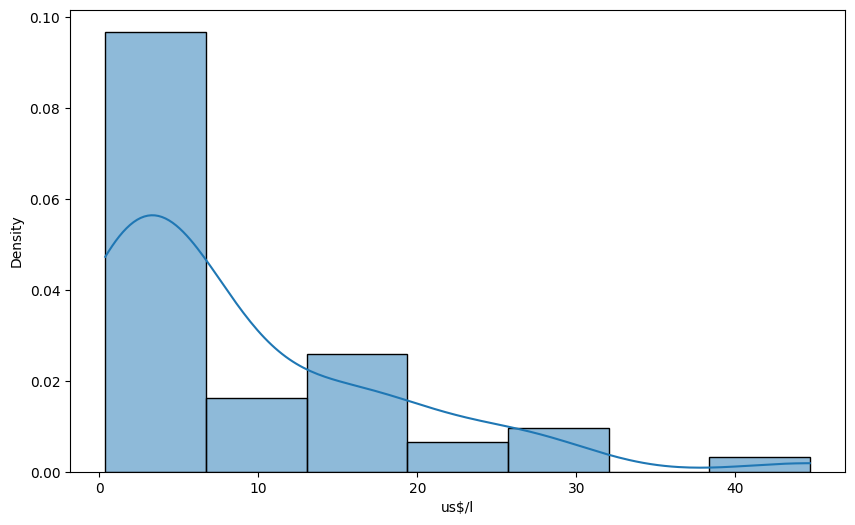

In [56]:
plt.figure(figsize=(10, 6))
df_3Q_quantidade = df_3Q_quantidade.groupby('pais').sum().sort_values('quantidade_exportacao',ascending=False)

sns.histplot(df_3Q_quantidade['us$/l'], kde=True, stat='density')

In [57]:
### 